<a href="https://colab.research.google.com/github/Keyur-0157/AI-Ground-water-management/blob/main/GW_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv("Copy of water_data.csv")
dataset

,Unnamed: 0,sno,district,mandal,village,temp_id,long_gis,lat_gis,gwl,Year,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,0,1,ADILABAD,Adilabad,Adilabad,1001,78.524700,19.668300,16.45,2018,...,129.0,95.00,5.00,48,111.826,579.810855,1.715349,C3S1,-6.796217,P.S.
1,1,2,ADILABAD,Bazarhatnur,Bazarhatnur,1002,78.350833,19.458888,38.60,2018,...,115.0,105.00,19.00,104,87.516,619.851974,1.833654,C3S1,-5.197039,P.S.
2,2,3,ADILABAD,Gudihatnoor,Gudihatnoor,1007,78.512222,19.525555,NaN,2018,...,56.0,55.00,2.00,56,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.
3,3,4,ADILABAD,Jainath,Jainath,1009,78.640000,19.730555,6.20,2018,...,30.0,63.00,2.00,40,19.448,179.967105,2.041814,C2S1,1.000658,P.S.
4,4,5,ADILABAD,Narnoor,Narnoor,1010,78.852654,19.495665,6.15,2018,...,25.0,49.00,7.00,32,24.310,179.958882,1.588114,C2S1,0.800822,P.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,350,375,YADADRI,S.Narayanpur,S.Narayanpur,1880,78.860010,17.144719,25.90,2020,...,32.0,148.00,2.00,144,102.102,779.827303,2.304277,C3S1,-9.796546,P.S.
1085,351,376,YADADRI,Thurkapally,Gandamalla,1881,78.853831,17.733101,6.73,2020,...,25.0,119.00,5.39,72,58.344,419.901316,2.524908,C3S1,-0.798026,P.S.
1086,352,377,YADADRI,Valigonda,T. somaram,1883,78.952290,17.399953,13.62,2020,...,10.0,43.55,2.77,56,34.034,279.942434,1.131686,C2S1,0.201151,P.S.
1087,353,378,YADADRI,Valigonda,Vemulakonda,1885,79.143433,17.347782,4.07,2020,...,105.0,532.00,7.30,400,77.792,1319.868421,6.366760,C4S2,-19.397368,P.S.


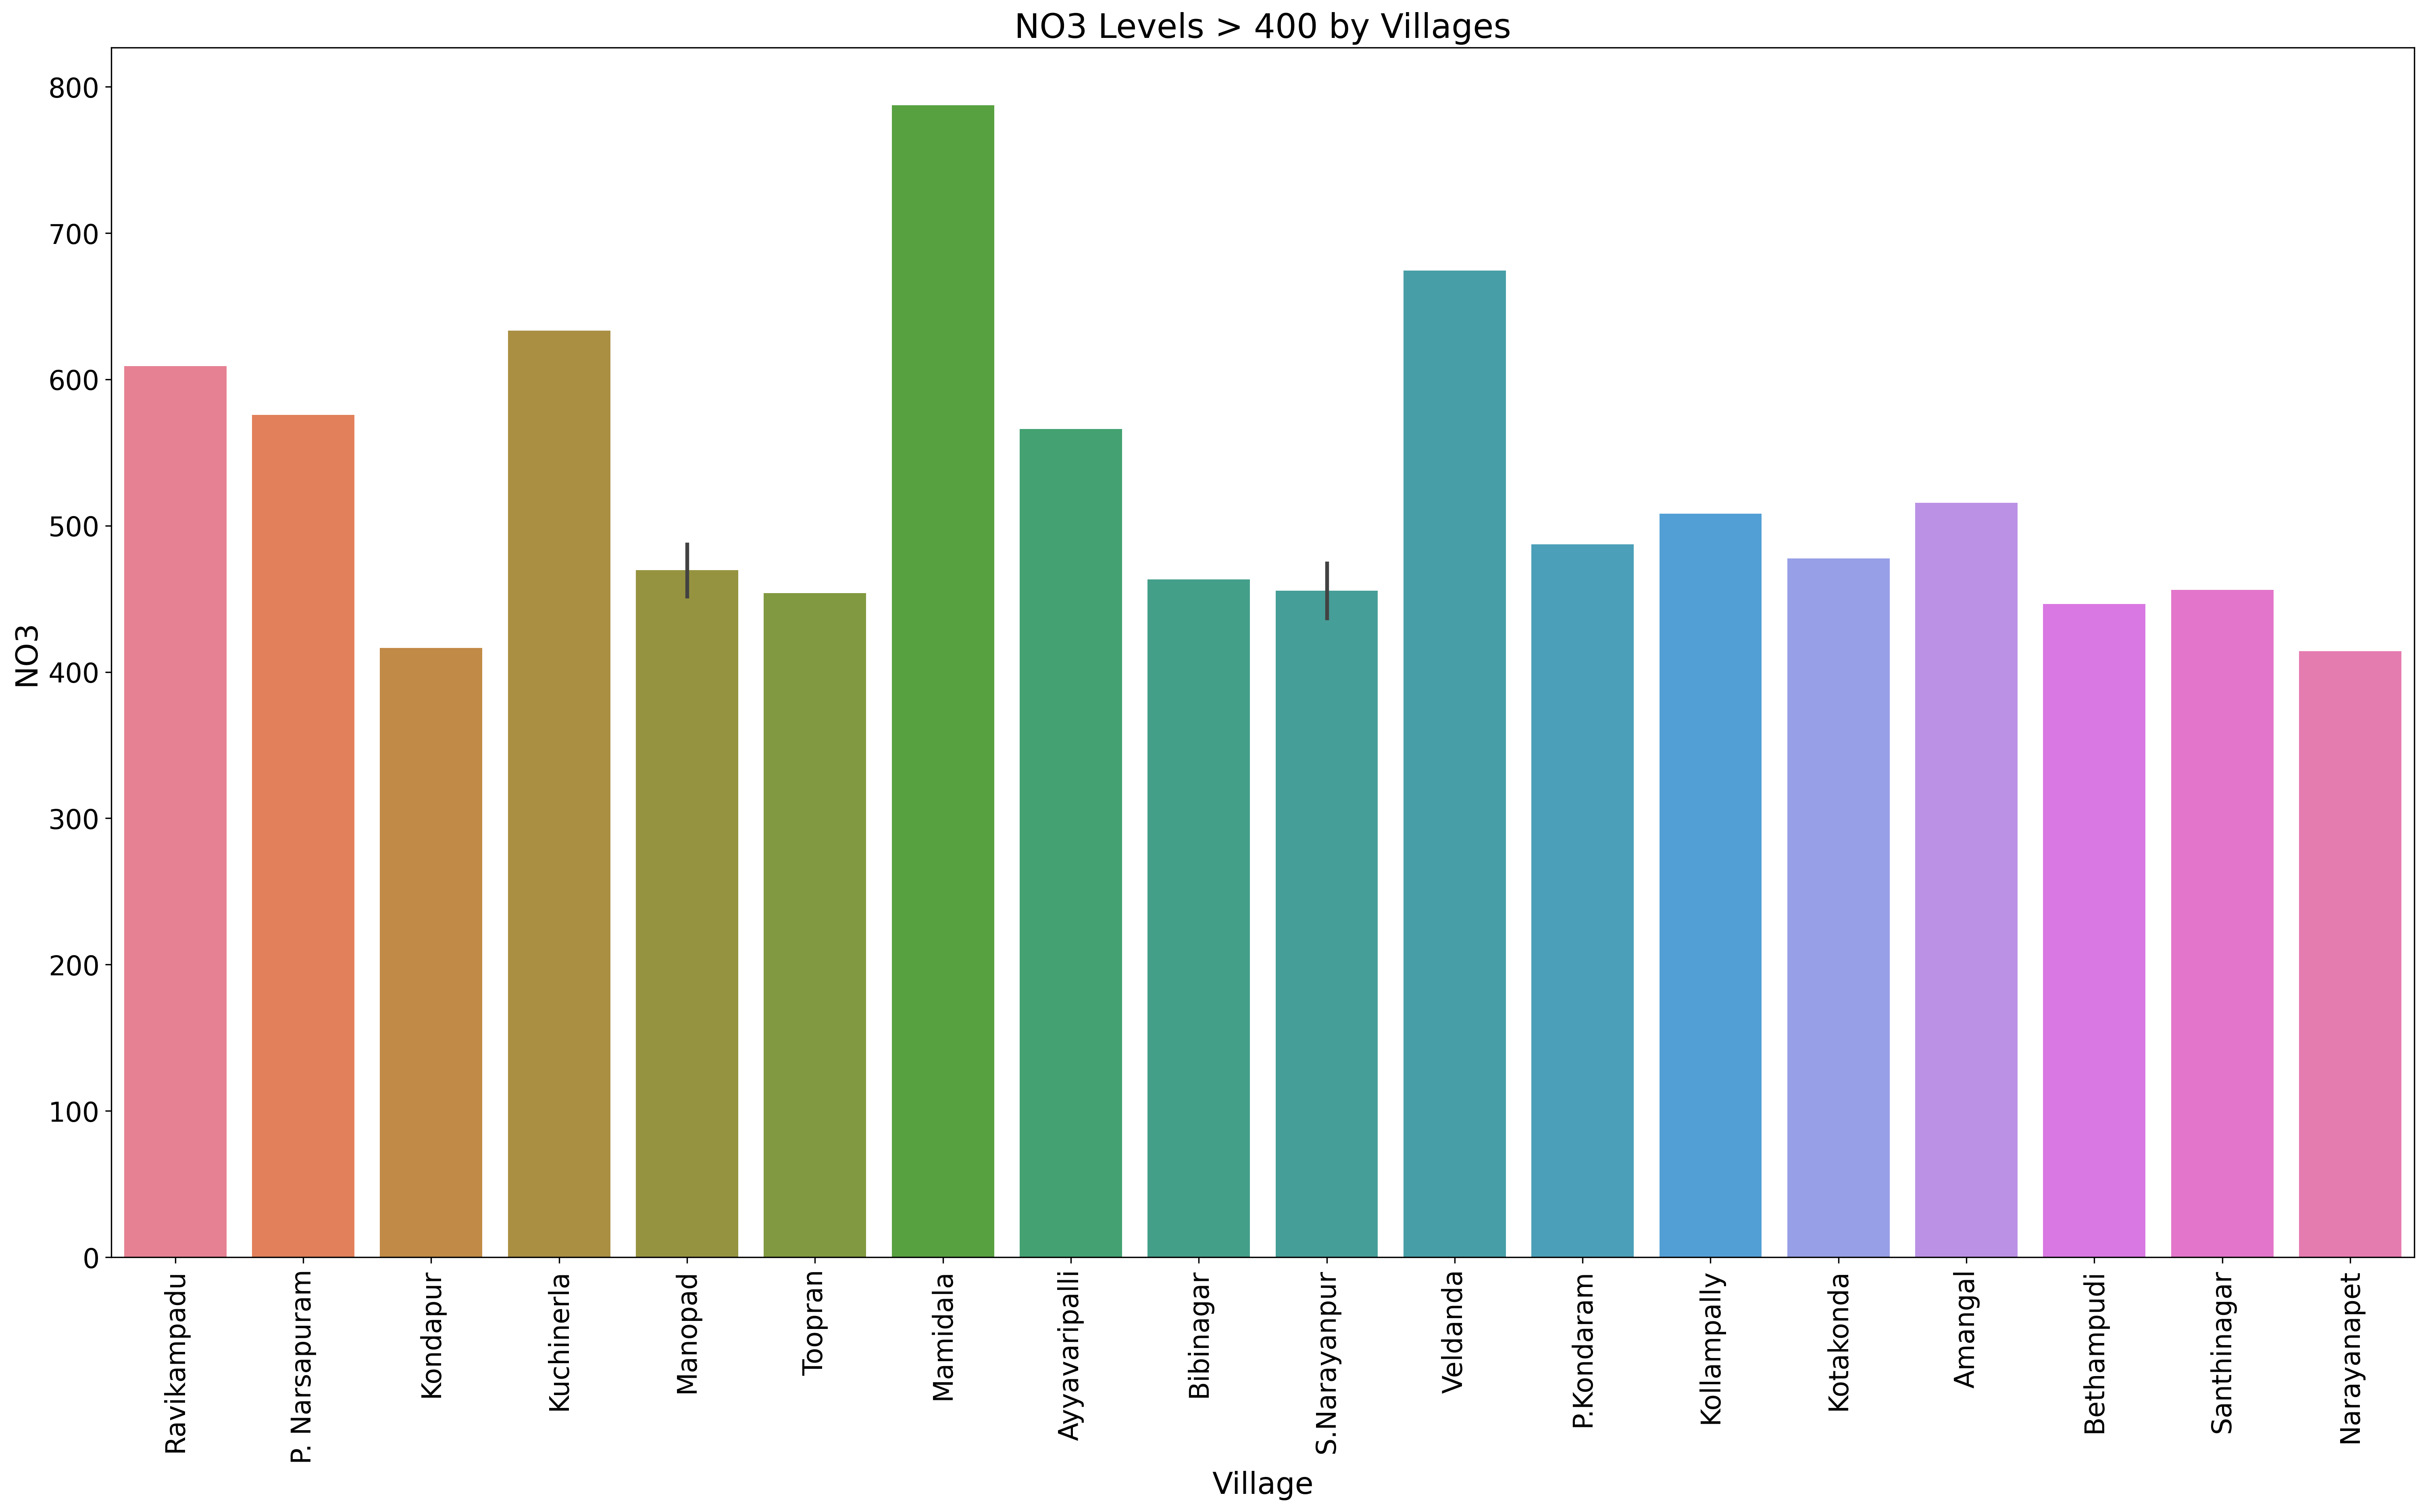

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better readability
plt.figure(figsize=(20, 12),dpi=300)

# Filter dataset for NO3 values greater than 400
gt_NO3 = dataset[dataset['NO3'] > 400]

# Plot the data using seaborn barplot
sns.barplot(data=gt_NO3, x='village', y='NO3', hue='village', dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('NO3 Levels > 400 by Villages',fontsize=20)
plt.xlabel('Village',fontsize=18)
plt.ylabel('NO3',fontsize=18)

# Adjust layout to accommodate legend
plt.subplots_adjust(right=0.75)

# Ensure everything fits properly
plt.tight_layout()
plt.xticks(rotation=90, fontsize=16)  # Increase tick labels font size
plt.yticks(fontsize=16)  # Increase y-axis tick labels font size

# Show the plot
plt.show()


In [ ]:
index_NO3_gt_400 = gt_NO3.iloc[:,0].values

In [ ]:
dataset['Classification.1'].value_counts()

,count
Classification.1,
P.S.,967
U.S.,71
MR,48
M.R,3


In [ ]:
dataset['Classification.1'] = dataset['Classification.1'].replace('MR', 'M.R')

In [ ]:
dataset['Classification.1'].value_counts()

,count
Classification.1,
P.S.,967
U.S.,71
M.R,51


<Axes: xlabel='Classification.1', ylabel='count'>

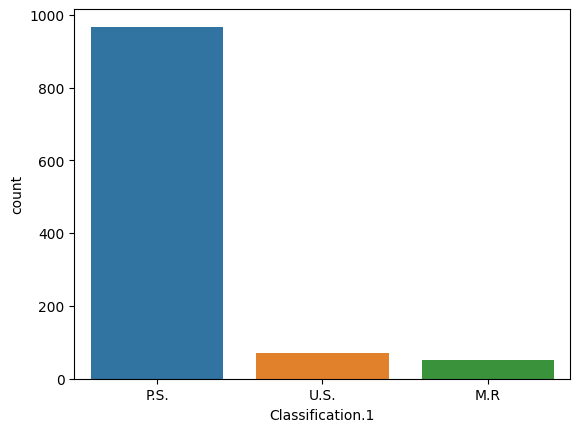

In [ ]:
sns.countplot(x=dataset['Classification.1'], data=dataset,hue=dataset['Classification.1'])

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1089.0,181.765840,105.529257,0.000000,90.000000,182.000000,273.000000,374.000000
sno,1089.0,190.094582,110.188497,1.000000,93.000000,190.000000,286.000000,379.000000
temp_id,1089.0,1501.199265,403.986440,1001.000000,1231.000000,1440.000000,1642.000000,4012.000000
long_gis,1089.0,78.776005,0.804845,77.444000,78.157100,78.566382,79.324780,80.920000
lat_gis,1089.0,17.710618,0.858231,15.896441,17.133000,17.644700,18.364000,19.730555
gwl,1062.0,13.617024,8.308509,1.400000,7.270000,11.765000,18.100000,49.110000
Year,1089.0,2018.982553,0.817248,2018.000000,2018.000000,2019.000000,2020.000000,2020.000000
pH,1089.0,8.048567,0.423736,6.660000,7.770000,8.050000,8.280000,10.590000
E.C,1089.0,1292.297153,760.256474,92.000000,792.000000,1126.000000,1611.000000,5560.000000
TDS,1089.0,826.607662,486.625971,58.880000,506.880000,716.800000,1029.760000,3558.400000


In [ ]:
###Feature Selection

X =dataset[['HCO3','E.C','F','Cl','SO4','Na', 'K', 'Ca', 'Mg']]
y =dataset[['NO3']]
print(X.shape)
X

(1089, 9)


,HCO3,E.C,F,Cl,SO4,Na,K,Ca,Mg
0,240.0,1407.0,0.34,190,129.0,95.00,5.00,48,111.826
1,360.0,1620.0,0.34,150,115.0,105.00,19.00,104,87.516
2,260.0,959.0,0.62,70,56.0,55.00,2.00,56,72.930
3,230.0,509.0,0.91,30,30.0,63.00,2.00,40,19.448
4,220.0,550.0,1.23,20,25.0,49.00,7.00,32,24.310
...,...,...,...,...,...,...,...,...,...
1084,290.0,2204.0,1.11,300,32.0,148.00,2.00,144,102.102
1085,380.0,1363.0,2.23,170,25.0,119.00,5.39,72,58.344
1086,290.0,708.0,2.30,40,10.0,43.55,2.77,56,34.034
1087,350.0,4878.0,0.80,1380,105.0,532.00,7.30,400,77.792


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(762, 9)
(327, 9)
(762, 1)
(327, 1)


In [ ]:
X_train_df = pd.DataFrame(X_train)
X_df = pd.DataFrame(X)
X_test_df = pd.DataFrame(X_test)

Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_linear_predict=model.predict(X_test)

In [ ]:
MAE=mean_absolute_error(y_test,test_linear_predict)
RMSE=np.sqrt(mean_squared_error(y_test,test_linear_predict))
print(MAE)
print(RMSE)

22.055021898121087
33.114331710894696


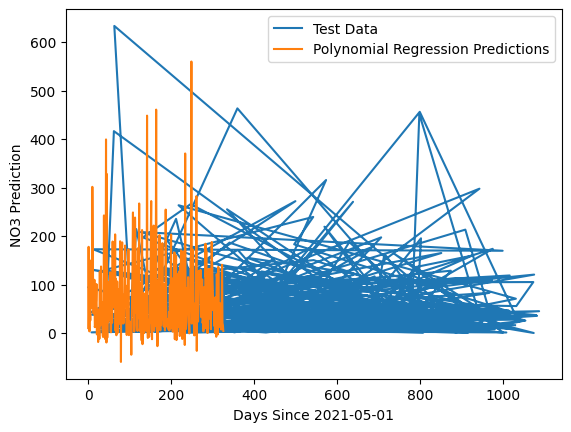

In [ ]:
plt.plot(y_test)
plt.plot(test_linear_predict)
plt.xlabel('Days Since 2021-05-01')
plt.ylabel('NO3 Prediction')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
import shap
import random

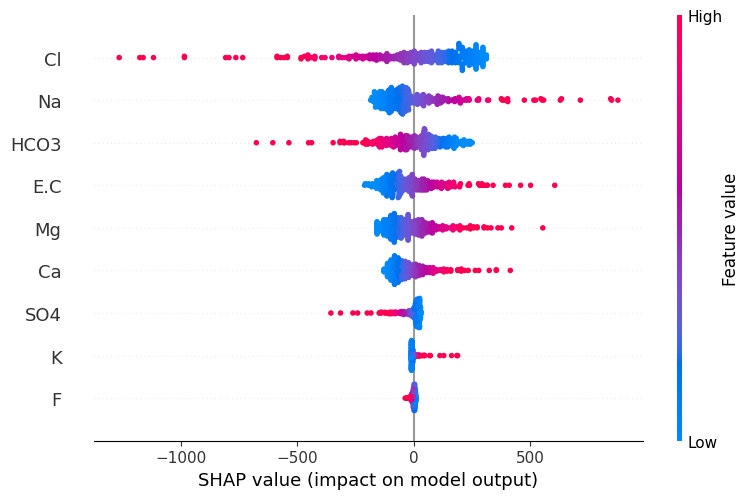

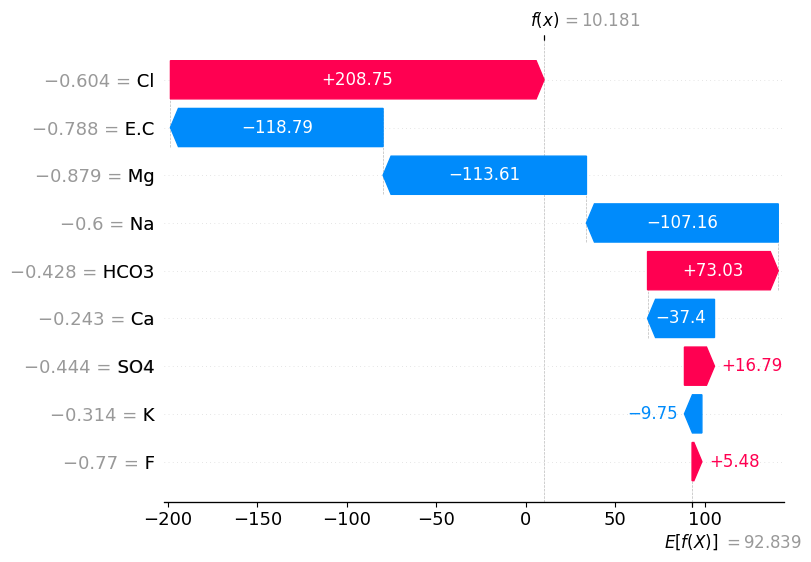

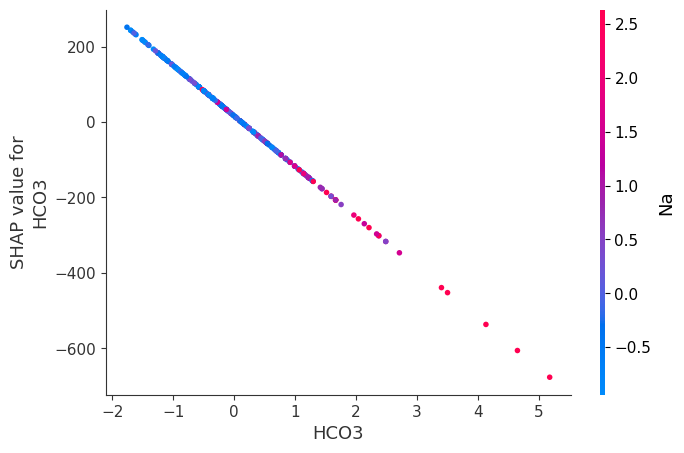

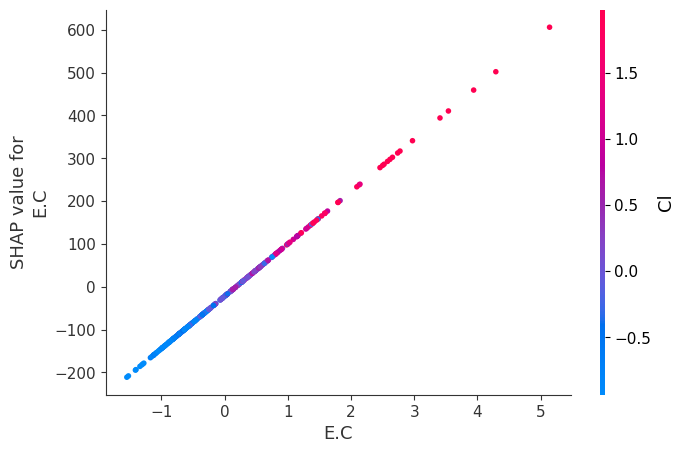

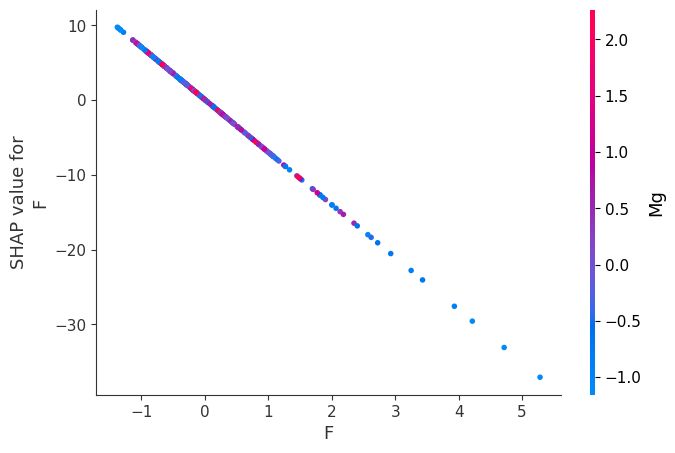

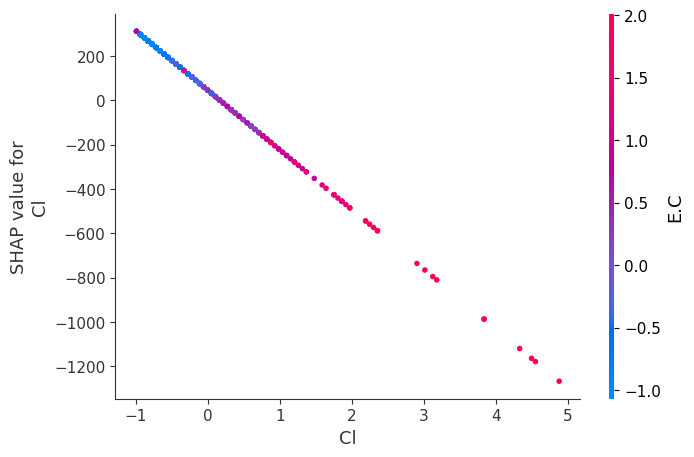

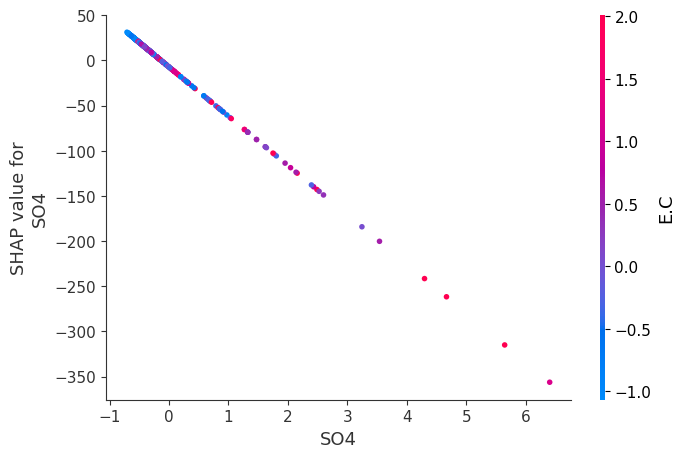

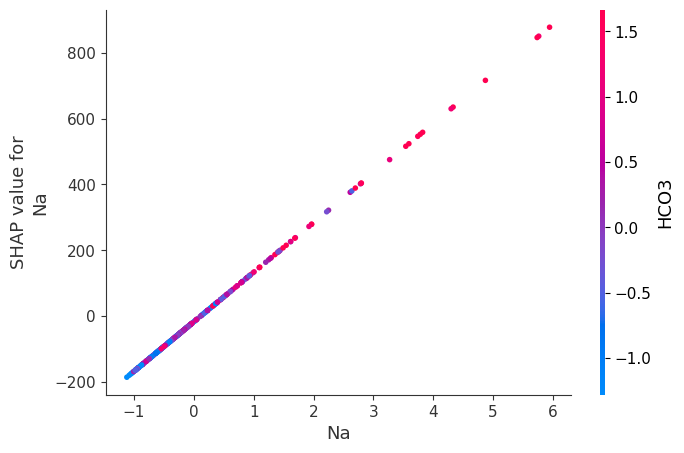

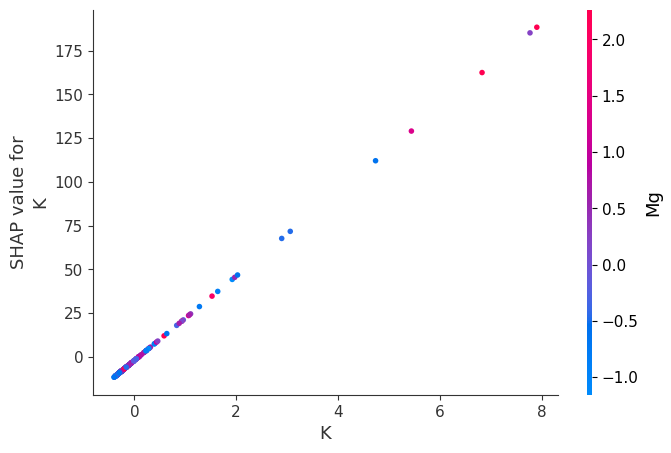

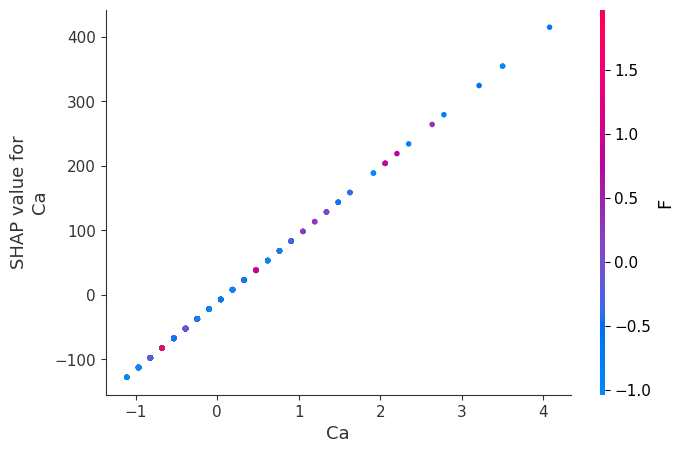

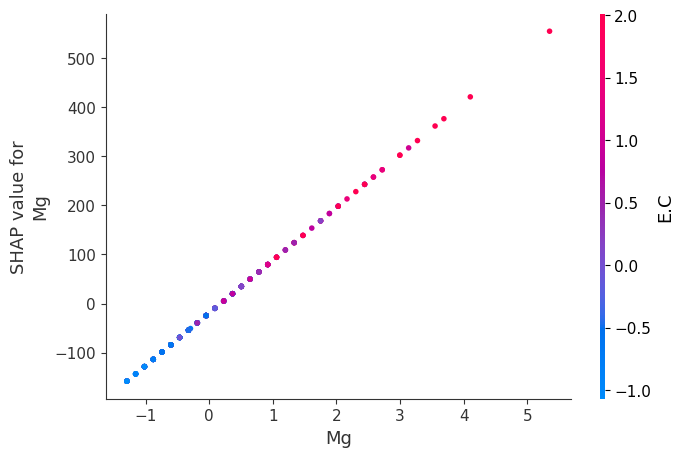

In [ ]:
feature_name = ['HCO3','E.C','F','Cl','SO4','Na', 'K', 'Ca', 'Mg']
explainer = shap.Explainer(model, X_train,feature_names = feature_name)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = feature_name)

# Individual SHAP value plot for a specific instance (replace index 0 with the desired index)
shap.waterfall_plot(shap_values[0])

# Optionally, you can also plot dependence plots for individual features
for feature in X_train_df.columns:
    shap.dependence_plot(feature, shap_values.values, X_test_df, feature_names = feature_name)

In [ ]:
shap.initjs()

instance_index = 0
instance = X_test[instance_index]

shap.force_plot(
    explainer.expected_value,
    shap_values[instance_index].values,
    instance,
    feature_names=feature_name
)

In [ ]:
import lime
from lime import lime_tabular

ModuleNotFoundError: No module named 'lime'

In [ ]:
# Randomize the rows in X_test_df.values
randomized_X_test_values = np.random.permutation(X_test_df.values)

# Now, you can use this randomized data for explaining instances
# Define the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_df.values, mode='regression', feature_names=feature_name)

# Explain a specific instance (replace index 0 with the desired index)
# You can use the first row of the randomized data for explanation, or pick any other index
exp = explainer.explain_instance(randomized_X_test_values[0], model.predict, num_features=len(X_df.columns))

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)


Model 2: Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Transform the test features
X_test_poly = poly_features.transform(X_test)

# Predict the target values
y_pred = model.predict(X_test_poly)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Model 3 : Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

In [ ]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
MAE=mean_absolute_error(y_test,y_1)
RMSE=np.sqrt(mean_squared_error(y_test,y_1))
print(MAE)
print(RMSE)

In [ ]:
MAE=mean_absolute_error(y_test,y_2)
RMSE=np.sqrt(mean_squared_error(y_test,y_2))
print(MAE)
print(RMSE)

In [ ]:
print("Feature importances:\n{}".format(regr_1.feature_importances_))

[[0= 'CO3',1= 'EC',2= 'F',3= 'Cl',4= 'WL',5='SO4',6= 'Na', 7= 'K', 8='Ca', 9= 'Mg']]

In [ ]:
def plot_feature_importances(model):
 plt.figure(figsize=(8,6))
 n_features = X.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features))
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances(regr_1)


Model 4 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

In [ ]:
y_1 = regr.predict(X_test)


In [ ]:
MAE=mean_absolute_error(y_test,y_1)
RMSE=np.sqrt(mean_squared_error(y_test,y_1))
print(MAE)
print(RMSE)

In [ ]:
n_estimators = 50
max_depth = None
max_features = len(X_train)

# Random Forest regressor
regressor_N = RandomForestRegressor(n_estimators= n_estimators, max_depth = max_depth, max_features=max_features, criterion='absolute_error', random_state=0)
regressor_N.fit(X_train, y_train)

In [ ]:
test_regressor_pred = regressor_N.predict(X_test)

print('MAE:', mean_absolute_error(test_regressor_pred, y_test))
print('MSE:',mean_squared_error(test_linear_predict, y_test))

In [ ]:
plt.plot(y_test)
plt.plot(test_regressor_pred)
plt.xlabel('Days Since 2021-05-01')
plt.ylabel('NO3 Prediction')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

Model 5: Support Vector Regrssor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg=SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_reg.fit(X_train,y_train)

In [ ]:
svr_predict = svr_reg.predict(X_test)

In [ ]:
MAE=mean_absolute_error(y_test,svr_predict)
RMSE=np.sqrt(mean_squared_error(y_test,svr_predict))
print(MAE)
print(RMSE)

In [ ]:
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train)

In [ ]:
svr_linear_predict = svr_reg.predict(X_test)

In [ ]:
MAE=mean_absolute_error(y_test,svr_linear_predict)
RMSE=np.sqrt(mean_squared_error(y_test,svr_linear_predict))
print(MAE)
print(RMSE)

Model 6 Multi layer Perceptron Regrssor

In [ ]:
from sklearn.neural_network import MLPRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train, y_train)

In [ ]:
y_pred = mlp_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.neural_network import MLPRegressor
import lime
import lime.lime_tabular
import shap

In [ ]:
sample_idx = 0

# Explain the model's prediction using LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train,feature_names = feature_name, mode="regression")
# Choose a sample for explanation
sample_idx = 0
# Explain the model's prediction using LIME
exp_lime = explainer_lime.explain_instance(X_test[sample_idx], mlp_reg.predict, num_features=len(X_train[0]))
# Visualize the explanation
exp_lime.show_in_notebook()

In [ ]:
# Permutation Importance
# feature_name = ['HCO3','E.C','F','Cl','SO4','Na', 'K', 'Ca', 'Mg']
# perm = PermutationImportance(mlp_reg).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = feature_name)

In [ ]:
import shap
from sklearn.neural_network import MLPRegressor

In [ ]:
explainer = shap.KernelExplainer(mlp_reg.predict, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
predicted_no3 = y_pred.flatten()

In [ ]:
# Find indices for villages with predicted nitrate levels in the specified ranges
idx_45_50 = np.where((predicted_no3 >= 45) & (predicted_no3 <= 50))[0][0]  # Village with predicted NO3 ~45-50
idx_100_110 = np.where((predicted_no3 >= 100) & (predicted_no3 <= 110))[0][0]  # Village with predicted NO3 ~100-110
idx_400_450 = np.where((predicted_no3 >= 400) & (predicted_no3 <= 450))[0][0]  # Village with predicted NO3 ~400-450

In [ ]:
instance_45_50 = X_test_scaled[idx_45_50]
instance_100_110 = X_test_scaled[idx_100_110]
instance_400_450 = X_test_scaled[idx_400_450]

In [ ]:
shap.initjs()

# Village with predicted NO3 ~45-50
print("Village with Predicted NO3 ~45-50:")
shap.force_plot(explainer.expected_value, shap_values[idx_45_50], instance_45_50,
                feature_names=X.columns, matplotlib=True)

In [ ]:
shap.initjs()
# Village with predicted NO3 ~100-110
print("Village with Predicted NO3 ~100-110:")
shap.force_plot(explainer.expected_value, shap_values[idx_100_110], instance_100_110,
                feature_names=X.columns, matplotlib=True)

In [ ]:
# Village with predicted NO3 ~400-450
print("Village with Predicted NO3 ~400-450:")
shap.force_plot(explainer.expected_value, shap_values[idx_400_450], instance_400_450,
                feature_names=X.columns, matplotlib=True)

In [ ]:
explainer = shap.Explainer(mlp_reg.predict, X_train, feature_names = feature_name)
shap_values = explainer(X_test)
feature_name = ['HCO3','E.C','F','Cl','SO4','Na', 'K', 'Ca', 'Mg']
# Summary plot
shap.summary_plot(shap_values, X_test,feature_names = feature_name)

# Individual SHAP value plot for a specific instance (replace index 0 with the desired index)
shap.plots.waterfall(shap_values[0])

# Optionally, you can also plot dependence plots for individual features
for feature in X_train_df.columns:
    shap.dependence_plot(feature, shap_values.values, X_test_df,feature_names = feature_name)

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("NO3 prediction test and predicted data")
plt.xlabel("Ground Water samples from different district")
plt.ylabel("NO3 Concentration")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
!pip install shap

Model 7: XGBOOST

In [ ]:
import xgboost

In [ ]:
from sklearn import ensemble

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 40,
    "min_samples_split": 60,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

model 9 : Light Gradient Boosting

In [ ]:
import lightgbm as lgb

In [ ]:
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [ ]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)

In [ ]:
# prediction
y_pred = model.predict(X_test)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("NO3 prediction test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

[[0= 'CO3',1= 'EC',2= 'F',3= 'Cl',4= 'WL',5='SO4',6= 'Na', 7= 'K', 8='Ca', 9= 'Mg']]

Model 10 : K Nighborhood Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
 knn = KNeighborsRegressor(n_neighbors=1)
 knn.fit(X_train, y_train)


In [ ]:
 knn_y_pred = knn.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,knn_y_pred)))

Other


In [ ]:
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
dataset.keys()
dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
###Feature Selection

features_selected =dataset[['CO3','E.C', 'TDS', 'Cl','SO4','Na', 'K', 'Ca', 'Mg']]
target_selected=dataset[['NO3']]

In [ ]:
###Feature Selection

X =dataset[['HCO3','E.C','F','Cl','SO4','Na', 'K', 'Ca', 'Mg']]
y =dataset[['NO3']]
print(X.shape)
X

In [ ]:
X_train=features_selected.head(400)
X_test=features_selected.tail(80)
Y_train=target_selected.head(400)
Y_test=target_selected.tail(80)

In [ ]:
len(X_train)
len(X_test)

In [ ]:
# polynomial regression
linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)



In [ ]:
test_linear_pred = linear_model.predict(X_test)

print('MAE:', mean_absolute_error(test_linear_pred, Y_test))
print('MSE:',mean_squared_error(test_linear_pred, Y_test))

In [ ]:
len(test_linear_pred)

In [ ]:
plt.plot(Y_test)
plt.plot(test_linear_pred)
plt.xlabel('Days Since 2021-05-01')
plt.ylabel('NO3 Prediction')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
### 4. Execute the regresor and make predictions



# Parametrization
n_estimators = 50
max_depth = None
max_features = len(X_train)

# Random Forest regressor
regressor_N = RandomForestRegressor(n_estimators= n_estimators, max_depth = max_depth, max_features=max_features, criterion='absolute_error', random_state=0)
regressor_N.fit(X_train, Y_train)

In [ ]:
test_regressor_pred = regressor_N.predict(X_test)

print('MAE:', mean_absolute_error(test_regressor_pred, Y_test))
print('MSE:',mean_squared_error(test_linear_pred, Y_test))

In [ ]:
plt.plot(Y_test)
plt.plot(test_regressor_pred)
plt.xlabel('Days Since 2021-05-01')
plt.ylabel('NO3 Prediction')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])